In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

train = pd.read_csv('./input/ccc.csv')
train.head()

,v,w,w/m,temp1,temp2,class
0,11.2,0.9,17.06,25.9,24.7,0
1,11.5,1.2,18.38,25.9,24.7,0
2,13.7,1.3,19.25,25.9,24.7,0
3,13.7,1.4,20.12,25.8,24.8,0
4,13.6,1.7,21.88,25.8,24.8,0


In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])
train.head()

,v,w,w/m,temp1,temp2,class
0,79,9,141,1,1,0
1,82,12,160,1,1,0
2,104,13,180,1,1,0
3,104,14,201,0,2,0
4,103,17,219,0,2,0


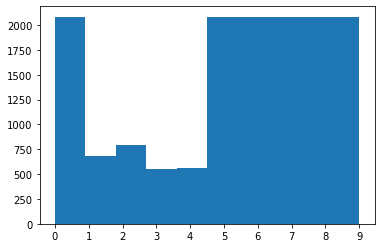

In [3]:
#x와 y를 분리하는 작업과 x를 정규화 시키는 작업
#y는 [graduation] 항목을 따로 모아두었고, x는 학습이 잘 되도록 0과 1사이의 숫자로 정규화

y = train['class'].values
x = train.drop(['class'], axis=1)
x = x.values
#x = (x - x.min()) / (x.max() - x.min())
plt.hist(y)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,shuffle = True, random_state=10)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
print(x_train.shape, y_train.shape)
print(x_train[0:1])
print(y_train[0:1])

(12076, 5) (12076, 10)
[[ 83 599 863 277  92]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [6]:
print(x_train[0])
print(y_train[0])
# print(type(x_train))
# print(type(y_train))

[ 83 599 863 277  92]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=48, activation='relu', input_shape=x_train[0].shape),
     tf.keras.layers.Dense(units=24, activation='relu'),
     tf.keras.layers.Dense(units=12, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax') ])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
Total params: 1,894
Trainable params: 1,894
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Train on 9660 samples, validate on 2416 samples
Epoch 1/50
9660/9660 [==============================] - 1s 148us/sample - loss: 3.4395 - accuracy: 0.1387 - val_loss: 2.1816 - val_accuracy: 0.1267
Epoch 2/50
9660/9660 [==============================] - 1s 75us/sample - loss: 2.1842 - accuracy: 0.1400 - val_loss: 2.1950 - val_accuracy: 0.1267
Epoch 3/50
9660/9660 [==============================] - 1s 71us/sample - loss: 2.1835 - accuracy: 0.1380 - val_loss: 2.1857 - val_accuracy: 0.1440
Epoch 4/50
9660/9660 [==============================] - 1s 72us/sample - loss: 2.1861 - accuracy: 0.1359 - val_loss: 2.1939 - val_accuracy: 0.1267
Epoch 5/50
9660/9660 [==============================] - 1s 69us/sample - loss: 2.1852 - accuracy: 0.1331 - val_loss: 2.1833 - val_accuracy: 0.1432
Epoch 6/50
9660/9660 [==============================] - 1s 73us/sample - loss: 2.1846 - accuracy: 0.1383 - val_loss: 2.1833 - val_accuracy: 0.1432


In [10]:
#Save Model
model.save('D:/deep-learning/model/ccc.h5')
model.save_weights('D:/deep-learning/model/ccc.h5')


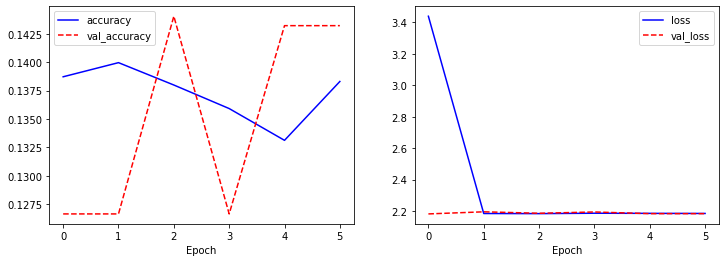

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2,2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

#plt.ylim(0, 1)
plt.legend()

plt.show()

In [16]:
model.evaluate(x_test, y_test)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.1858335990779447, 0.13145696]

In [17]:
print(x_test[0])
print(y_test[0])
print(x_test[0].shape)
print(type(x_test))

[ 104  103 1141   21    9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(5,)
<class 'numpy.ndarray'>


In [18]:
print(x_test[0:1])

[[ 104  103 1141   21    9]]


In [19]:
print(y_test[0:1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [20]:
print(model.predict(x_test[0:1]))

[[0.12282629 0.03675509 0.05357365 0.03653945 0.04615401 0.14063735
  0.15449473 0.15287685 0.12277433 0.1333682 ]]
